In [2]:
!pip install PyPDF2
!pip install matplotlib
!pip install seaborn
!pip install datetime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 14.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [4]:
# Helper functions
def extract_text_from_pdf(pdf_file):
    """Extract text content from a PDF file."""
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

In [5]:
def rank_resumes(job_description, resumes):
    """Rank resumes based on similarity to the job description."""
    texts = [job_description] + list(resumes.values())
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(texts)
    similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()

    ranked = sorted(
        zip(resumes.keys(), similarities),
        key=lambda x: x[1],
        reverse=True
    )
    return ranked

In [10]:
def perform_eda(data, title):
    """Perform EDA and visualize the given data."""
    print(f"\n{title}")
    print(data.describe())
    print("\nMissing Values:\n", data.isnull().sum())

    if 'Total Salary' in data.columns:
        # Visualize payroll data
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Total Salary", y="Employee Name", data=data)
        plt.title("Employee Payroll Summary")
        plt.xlabel("Total Salary (USD)")
        plt.ylabel("Employee Name")
        plt.show()
    if 'Performance Score' in data.columns:
      # Visualize performance data
      plt.figure(figsize=(10, 6))
      sns.lineplot(data=data, x=data.index, y="Performance Score", marker="o")
      plt.title("Employee Performance Scores")
      plt.xlabel("Employee Index")
      plt.ylabel("Performance Score")
      plt.show()

Welcome to the HR Automation and EDA System!
Enter the job description: Minimum 1-2 years’ experience Supernet E-Solutions E—Solutions is looking for strong Junior Software Developer for its Karachi Office. Developers who will help us design and rebuild our next-generation enterprise solutions.  As a Junior Software Developer on our team, you will be involved in developing and testing as well as supporting software applications. Also, you will analyse client needs and resolve problems according to requests. You will work in a team, and you will write documentation for the software products in order to comply with customer requirements.  What we need? 1. Must have good experience in JAVA/J2EE, Android Studio, Core Java (1.7/ 1.8), J2EE (JSP, Servlets),sql, AJAX, HTML, JavaScript, HTML5, CSS3, bootstrap. 2. Experience developing/consuming web services (REST, SOAP, and JSON), ETL jobs, and APIs (service-oriented architectures). 3. Android SDK About you 1. You will ideally have obtained a 

<ipython-input-13-5da7ba9a055b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=names, palette="viridis")


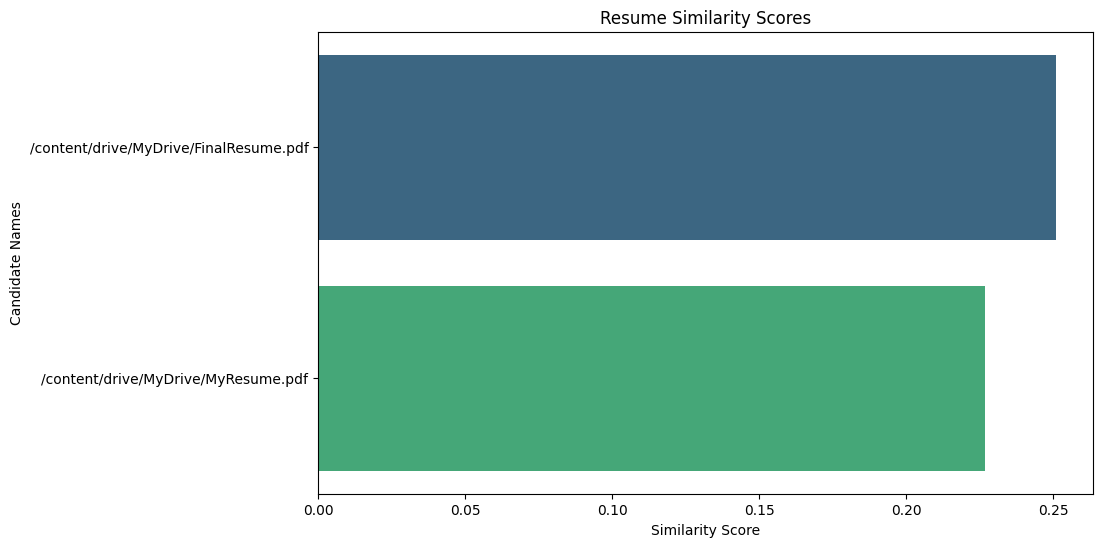

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Helper functions
def extract_text_from_pdf(pdf_file):
    """Extract text content from a PDF file."""
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

def rank_resumes(job_description, resumes):
    """Rank resumes based on similarity to the job description."""
    if not resumes or not job_description:
        return None, "Please upload resumes and provide a job description first."

    texts = [job_description] + list(resumes.values())
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(texts)
    similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()

    ranked = sorted(
        zip(resumes.keys(), similarities),
        key=lambda x: x[1],
        reverse=True
    )
    return ranked, None

def eda_on_resumes(ranked_resumes, job_description):
    """Perform Exploratory Data Analysis (EDA) on ranked resumes."""
    if not ranked_resumes:
        print("No resumes to analyze.")
        return

    # Extract data for visualization
    names = [name for name, _ in ranked_resumes]
    scores = [score for _, score in ranked_resumes]

    # Basic statistics
    print("\nEDA on Resume Ranking:")
    print(f"Total Resumes: {len(names)}")
    print(f"Average Similarity Score: {sum(scores) / len(scores):.2f}")
    print(f"Highest Similarity Score: {max(scores):.2f}")
    print(f"Lowest Similarity Score: {min(scores):.2f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=names, palette="viridis")
    plt.title("Resume Similarity Scores")
    plt.xlabel("Similarity Score")
    plt.ylabel("Candidate Names")
    plt.show()

# Main Function
if __name__ == "__main__":
    resumes = {}
    print("Welcome to the HR Automation and EDA System!")

    # Input Job Description
    job_description = input("Enter the job description: ")

    # Upload Resumes
    print("\nUpload resumes in PDF format. Type 'done' when finished.")
    while True:
        file_path = input("Enter the path of the resume PDF (or 'done'): ")
        if file_path.lower() == 'done':
            break
        try:
            with open(file_path, 'rb') as file:
                content = extract_text_from_pdf(file)
                resumes[file_path] = content
                print(f"Resume uploaded: {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    # Rank Resumes
    if resumes:
        ranked_resumes, error = rank_resumes(job_description, resumes)
        if error:
            print(error)
        else:
            print("\nRanked Resumes:")
            for i, (name, score) in enumerate(ranked_resumes, start=1):
                print(f"{i}. {name} - Similarity Score: {score:.2f}")

            # Perform EDA
            eda_on_resumes(ranked_resumes, job_description)
    else:
        print("No resumes were uploaded.")


In [14]:
payroll_data = []
performance_data = []
interview_data = []


In [15]:
# Add Payroll Data
def add_payroll(employee_name, base_salary, performance_bonus):
    total_salary = base_salary + (base_salary * performance_bonus / 100)
    payroll_data.append({
        "Employee Name": employee_name,
        "Base Salary": base_salary,
        "Performance Bonus (%)": performance_bonus,
        "Total Salary": total_salary
    })


In [23]:
# EDA and Visualization
## Payroll Analysis
def payroll_eda():
    payroll_df = pd.DataFrame(payroll_data)
    print("Payroll Data:")
    print(payroll_df.describe())

    # Plot total salaries
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Total Salary", y="Employee Name", data=payroll_df)
    plt.title("Employee Payroll Summary")
    plt.xlabel("Total Salary (USD)")
    plt.ylabel("Employee Name")
    plt.show()

In [26]:
if __name__ == "__main__":
    # Adding dummy data for payroll data
    add_payroll("John Doe", 5000, 10)
    add_payroll("Jane Smith", 4500, 15)
    add_payroll("Hannah", 900, 50)
    add_payroll("Noor", 5500, 15)

--- Payroll EDA ---
Payroll Data:
       Base Salary  Performance Bonus (%)  Total Salary
count    10.000000              10.000000     10.000000
mean   4440.000000              16.500000   5037.500000
std    1287.719776              12.030055   1341.084242
min     900.000000              10.000000   1350.000000
25%    4500.000000              10.000000   5175.000000
50%    4750.000000              15.000000   5337.500000
75%    5000.000000              15.000000   5500.000000
max    5500.000000              50.000000   6325.000000


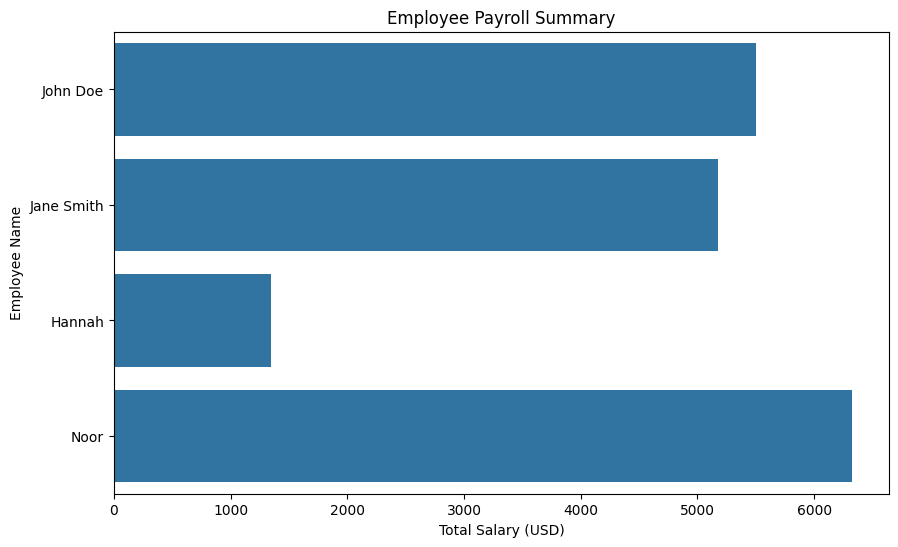

In [27]:
print("--- Payroll EDA ---")
payroll_eda()

In [28]:
# Add Performance Data
def add_performance(employee_name, performance_score):
    performance_data.append({
        "Employee Name": employee_name,
        "Performance Score": performance_score
    })


In [30]:
## Performance Analysis
def performance_eda():
    performance_df = pd.DataFrame(performance_data)
    print("Performance Data:")
    print(performance_df.describe())

     # Plot performance scores
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=performance_df, x=performance_df.index, y="Performance Score", marker="o")
    plt.title("Employee Performance Scores")
    plt.xlabel("Employee Index")
    plt.ylabel("Performance Score")
    plt.show()

In [33]:
# Add sample performance data
add_performance("John Doe", 8)
add_performance("Jane Smith", 9)
add_performance("Hannah",5)
add_performance("Noor",3)
add_performance("Pookie", 10)

--- Performance EDA ---
Performance Data:
       Performance Score
count           7.000000
mean            7.428571
std             2.507133
min             3.000000
25%             6.500000
50%             8.000000
75%             9.000000
max            10.000000


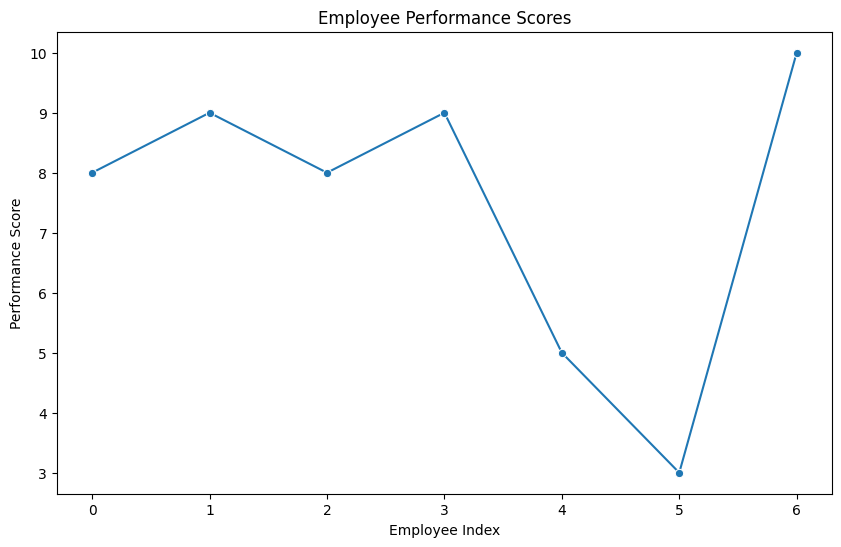

In [34]:
print("--- Performance EDA ---")
performance_eda()

In [35]:
# Schedule Interviews
def schedule_interview(candidate_name, interview_date, interview_time):
    interview_data.append({
        "Candidate Name": candidate_name,
        "Interview Date": interview_date,
        "Interview Time": interview_time
    })

In [36]:
## Interview Scheduling Analysis
def interview_eda():
    interview_df = pd.DataFrame(interview_data)
    print("Interview Data:")
    print(interview_df.head())

    # Count interviews per date
    interview_counts = interview_df["Interview Date"].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=interview_counts.index, y=interview_counts.values, palette="coolwarm")
    plt.title("Interviews Scheduled Per Date")
    plt.xlabel("Interview Date")
    plt.ylabel("Number of Interviews")
    plt.xticks(rotation=45)
    plt.show()

In [37]:
# Add sample interview data
schedule_interview("Alice Brown", datetime.date(2025, 1, 15), datetime.time(10, 0))
schedule_interview("Bob Green", datetime.date(2025, 1, 16), datetime.time(14, 0))

--- Interview EDA ---
Interview Data:
  Candidate Name Interview Date Interview Time
0    Alice Brown     2025-01-15       10:00:00
1      Bob Green     2025-01-16       14:00:00


<ipython-input-36-e9b563d823db>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interview_counts.index, y=interview_counts.values, palette="coolwarm")


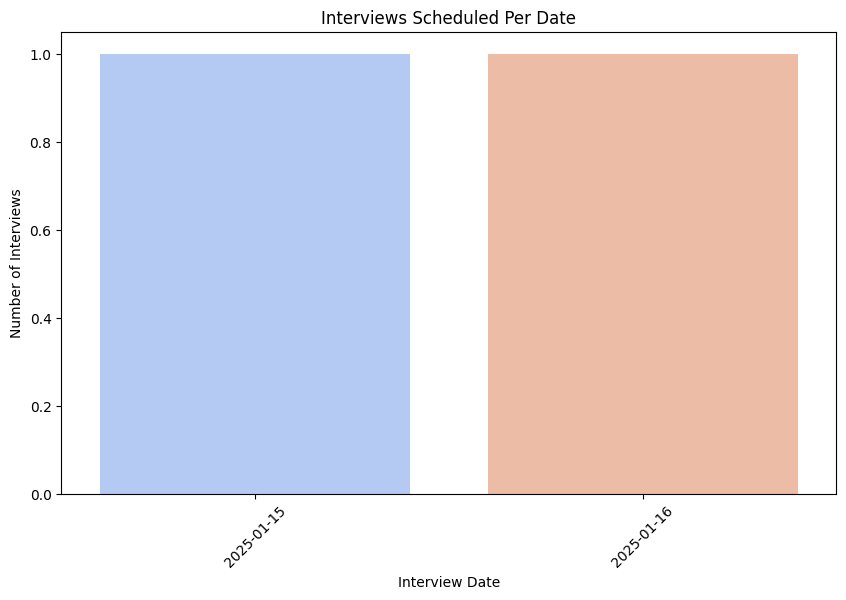

In [38]:
print("--- Interview EDA ---")
interview_eda()